# Exploring data for a better understanding

##  Get data in local file

In [1]:
import pandas as pd
data = pd.read_csv("../data/Telco_customer_churn.csv")

## Cleaning

In [2]:
# Delete missing data
data.dropna()
missing_values = data.isnull().sum()
print(missing_values)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [3]:
# Delete duplicated values
data.drop_duplicates()
duplicated_values = data.duplicated().sum()
print(duplicated_values)

0


## Let's Go

### Basics

In [4]:
# Matrix shape
data.shape

(7043, 33)

In [5]:
# Matrix size
data.size

232419

In [6]:
# Show first line
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
# Data columns
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
# Description about data
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Client geographical distribution

In [10]:
import plotly.express as px

# map
fig = px.scatter_mapbox(data, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="CustomerID",
                        hover_data=["Country", "State", "City", "Zip Code", "Churn Value"],
                        color="Churn Value",
                        color_discrete_map={1: "red", 0: "green"},
                        zoom=4.2, 
                        height=300)
# style
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker=dict(size=10, opacity=0.5))
fig.update_traces(hoverlabel=dict(bgcolor='white', bordercolor='black', font=dict(size=12)))

# titre
fig.update_layout(title="Position des utilisateur selon leur abandon",
                        xaxis_title="Longitude",
                        yaxis_title="Latitude",
                        font=dict(family="Arial", size=14, color="white"))

# Affichage
fig.show()

In [11]:
# Les villes des clients
data['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [12]:
#Nombre de client par ville
data.groupby(['City'], as_index = False).agg({'CustomerID': 'nunique'}).rename({'CustomerID': 'clients'}, axis = 1).sort_values('clients', ascending = False)

,City,clients
562,Los Angeles,305
869,San Diego,150
878,San Jose,112
855,Sacramento,108
872,San Francisco,104
...,...,...
434,Hood,4
435,Hoopa,4
436,Hopland,4
437,Hornbrook,4


In [13]:
## grouper les nombre de client par Zip Codes , nombre de Churner
data_grouped_churn_city = data.groupby("City", as_index = False).agg({'CustomerID': 'nunique', "Churn Value": 'sum'}).rename({'CustomerID': 'clients', 'Churn Value': 'Abandon'}, axis = 1).sort_values('clients', ascending = False)

## affichage
print(data_grouped_churn_city)

               City  clients  Abandon
562     Los Angeles      305       90
869       San Diego      150       50
878        San Jose      112       29
855      Sacramento      108       26
872   San Francisco      104       31
...             ...      ...      ...
434            Hood        4        1
435           Hoopa        4        1
436         Hopland        4        1
437       Hornbrook        4        1
1128          Zenia        4        1

[1129 rows x 3 columns]


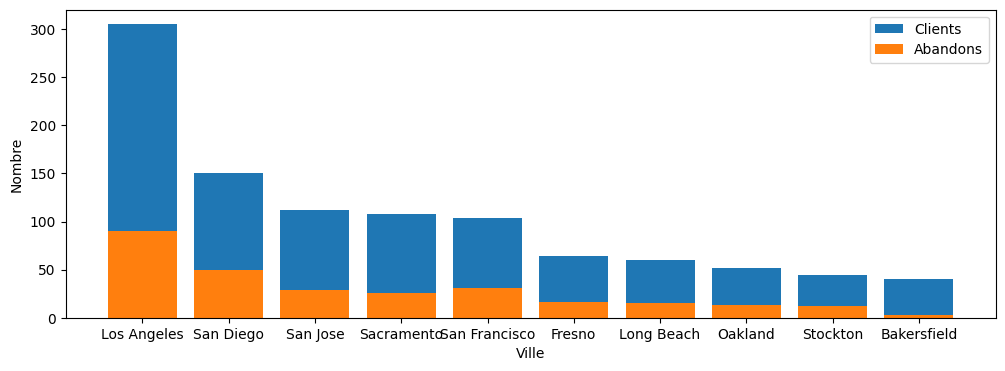

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.bar(data_grouped_churn_city['City'].head(10),data_grouped_churn_city['clients'].head(10), label="Clients")
plt.bar(data_grouped_churn_city['City'].head(10),data_grouped_churn_city['Abandon'].head(10), label="Abandons")
plt.xlabel('Ville')
plt.ylabel('Nombre')
plt.legend()
plt.show()

## Link between Data

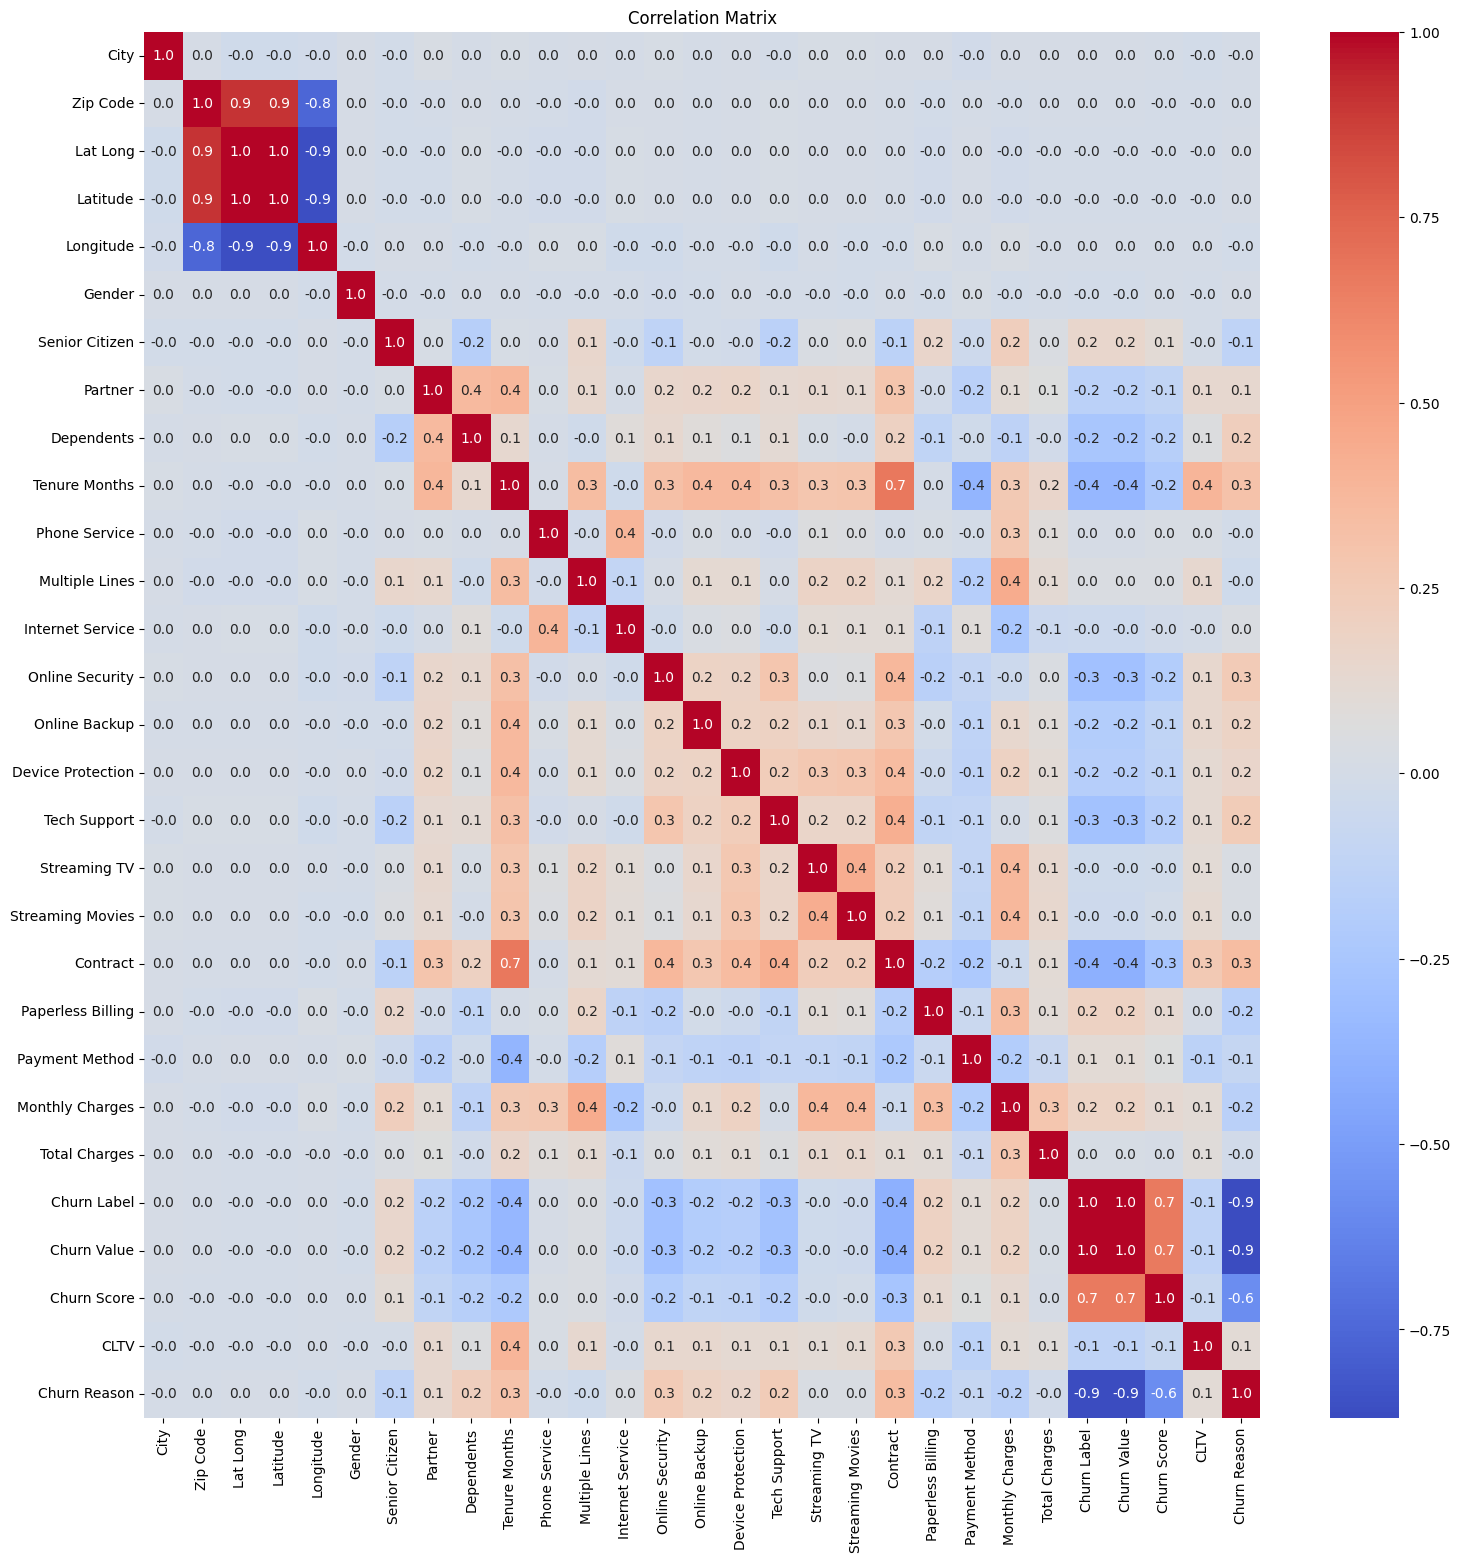

In [40]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Delete some column
# data2 = data.drop(['CustomerID','Count','Country','State','Lat Long'], axis =1, inplace=True)

# Calculer la matrice de corrélation
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)
correlation_matrix = data_encoded.drop(columns=['CustomerID', 'Count', 'Country', 'State']).corr()

# Afficher la matrice de corrélation
# print(correlation_matrix)

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

## Churn reason

In [16]:
# choix du nombre de raison a afficher 
top_n_reasons = 10

# Recucuperation des 10 premieres raisons
churn_reason_counts = data['Churn Reason'].value_counts().head(top_n_reasons)

# Extraction des raison et des nombres de personne
reason_labels = churn_reason_counts.index.to_numpy()
reason_counts = churn_reason_counts.to_numpy()

# Creation de l'histogramme
fig = px.bar(x=reason_labels, y=reason_counts, color=reason_counts, text=churn_reason_counts)

fig.update_layout(
    title="Principales raisons de churn (en fonction de la fréquence)",
    xaxis_title="Raison du churn",
    yaxis_title="Nombre de client",
)

# Affichage
fig.show()

### Human based analysis

In [17]:
## Par sexe
data.groupby(['Gender', 'Churn Value']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Gender Churn Value            
Female 0                  2549
       1                   939
Male   0                  2625
       1                   930

In [18]:
## Par tranche d'age
data.groupby(['Senior Citizen', 'Churn Value']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Senior Citizen Churn Value            
No             0                  4508
               1                  1393
Yes            0                   666
               1                   476

In [19]:
## Par situation amoureuse
data.groupby(['Partner', 'Churn Value']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Partner Churn Value            
No      0                  2441
        1                  1200
Yes     0                  2733
        1                   669

In [20]:
## Par personne a charge
data.groupby(['Dependents', 'Churn Value']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Dependents Churn Value            
No         0                  3653
           1                  1763
Yes        0                  1521
           1                   106

## Insight 

- Latitude and longitude is duplicated with latlong, we can delete it 
- Country, state, count can be delete because of high cardinality
- Principal raisons of churn are divers
- Churn is equalily distributed into cities
- Churn score and churn value are highly corralated (it is logic) we need to delete two alues to get logic predictions 
- Clients are equaly distributed into california 